In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import scipy.stats as sstats

In [2]:
p = 0.000144
q = 0.31
#m = 10_000_000
m = 6_000_000

Y_t = np.array([1300, 24000, 50_000, 170_000, 200_000])
t = np.array([2016, 2017, 2018, 2019, 2020])

I_t_1 = np.array([2, 5, 6, 9, 12])

In [3]:
P_t = p + (q/m) * Y_t
P_t


array([0.00021117, 0.001384  , 0.00272733, 0.00892733, 0.01047733])

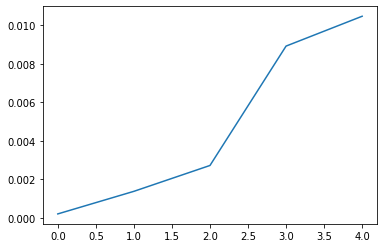

In [4]:
plt.plot(P_t)
plt.show()

In [5]:
tenth_percentile = lambda mu, std: sstats.norm.interval(0.90, mu, std)[0]
ninty_percentile = lambda mu, std: sstats.norm.interval(0.90, mu, std)[1]
# Add 10th and 90th percentiles
ps = [tenth_percentile(0.000144, 1.82e-5), 0.000144, ninty_percentile(0.000144, 1.82e-5)]
qs = [tenth_percentile(0.31, 0.0015), 0.31, ninty_percentile(0.31, 0.0015)]

# population
m = 10_000_000

num_years = 40
years = np.arange(num_years)
I_t = np.zeros(num_years)
I_t[0] = 2307  # 2011
I_t[1] = 4541
I_t[2] = 7114
I_t[3] = 12156
I_t[4] = 18948
I_t[5] = 25502
I_t[6] = 34022
I_t[7] = 53861
I_t[8] = 83175
I_t[9] = 136617  # 2020



In [6]:
qs


[0.3075327195595728, 0.31, 0.3124672804404272]

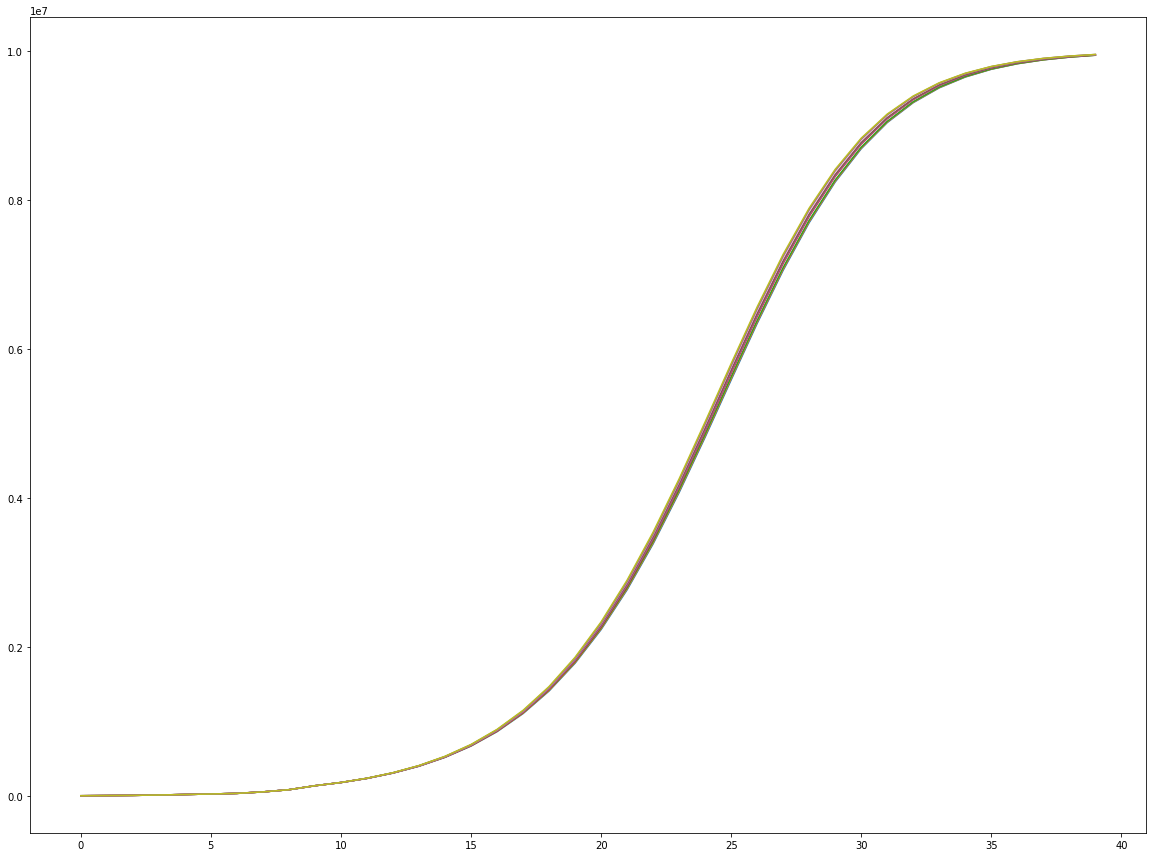

In [7]:
figure(num=None, figsize=(20, 15))
for q in qs:
    for p in ps:
        for i in range(9, len(years) - 1):
            I_t[i+1] = I_t[i] + p * (m - I_t[i]) + q * (I_t[i]/m) * (m - I_t[i])
        plt.plot(I_t);

# print(I_t)

In [8]:
p = 0.000144
q = 0.31
#m = 10_000_000
m = 6_000_000

num_years = 40
years = np.arange(num_years)
I_t = np.zeros(num_years)
I_t[0] = 2307  # 2011
I_t[1] = 4541
I_t[2] = 7114
I_t[3] = 12156
I_t[4] = 18948
I_t[5] = 25502
I_t[6] = 34022
I_t[7] = 53861
I_t[8] = 83175
I_t[9] = 136617  # 2020

P_t = np.zeros(num_years)



In [9]:
for i in range(0, num_years-1):
    P_t[i] = p + (q/m) * I_t[i]

P_t

array([0.0002632 , 0.00037862, 0.00051156, 0.00077206, 0.00112298,
       0.0014616 , 0.0019018 , 0.00292682, 0.00444138, 0.00720255,
       0.000144  , 0.000144  , 0.000144  , 0.000144  , 0.000144  ,
       0.000144  , 0.000144  , 0.000144  , 0.000144  , 0.000144  ,
       0.000144  , 0.000144  , 0.000144  , 0.000144  , 0.000144  ,
       0.000144  , 0.000144  , 0.000144  , 0.000144  , 0.000144  ,
       0.000144  , 0.000144  , 0.000144  , 0.000144  , 0.000144  ,
       0.000144  , 0.000144  , 0.000144  , 0.000144  , 0.        ])

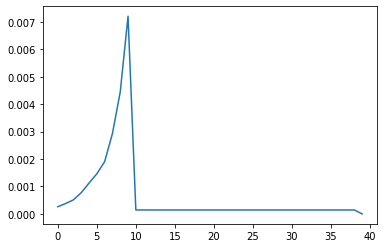

In [10]:
plt.plot(P_t)
plt.show()